<a href="https://colab.research.google.com/github/yves-moringa/CoreIpWk2/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2022_03_Yves_Havugimana_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We import all librares and packages we might need for our analysis and visualization

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [ ]:
# Load dataset with column descriptions

variables = pd.read_csv("http://bit.ly/VariableDefinitions")

In [ ]:
# preview variables dataset and their descriptions

# After viewing the dataset, we have 11 variables

# All of the variables can be considered to be catergorical except the 'uniqueid' and the 'age_of_respondent'

print(variables)

      Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming

In [ ]:
fin_all = pd.read_csv("http://bit.ly/FinancialDataset")

fin_all.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
fin_all.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
fin_all.duplicated().value_counts()

False    23524
dtype: int64

In [ ]:
# Checking for duplicates uin variable "uniqueid"

# We cannot use the column "uniqueid" as index as it contains several duplicates

fin_all["uniqueid"].duplicated().value_counts()

True     14789
False     8735
Name: uniqueid, dtype: int64

In [ ]:
# Checking the list of countries we have in column "country"

# We notice that we have 11 records with no country name

fin_all.groupby(['country'], dropna=False, as_index=False).size()

,country,size
0,Kenya,6068
1,Rwanda,8735
2,Tanzania,6606
3,Uganda,2101
4,NaN,14


In [ ]:
# the 14 records with no country

fin_all[fin_all["country"].isnull() == True]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
18200,NaN,2017,uniqueid_3398,No,Urban,Yes,1.0,25.0,Female,Spouse,Single/Never Married,Primary education,Remittance Dependent
18201,NaN,2017,uniqueid_3399,No,Urban,No,1.0,60.0,Female,Head of Household,Widowed,Primary education,Self employed
18202,NaN,2017,uniqueid_3400,No,Urban,Yes,1.0,19.0,Female,Spouse,Single/Never Married,Primary education,No Income
18203,NaN,2017,uniqueid_3401,No,Urban,No,1.0,62.0,Female,Head of Household,Widowed,No formal education,Self employed
18204,NaN,2017,uniqueid_3402,No,Urban,No,2.0,42.0,Female,Head of Household,Widowed,No formal education,Self employed
18205,NaN,2017,uniqueid_3403,No,Rural,No,3.0,18.0,Male,Child,Divorced/Seperated,Secondary education,Remittance Dependent
18206,NaN,2017,uniqueid_3404,No,Urban,Yes,2.0,73.0,Female,Head of Household,Married/Living together,No formal education,Self employed
18207,NaN,2017,uniqueid_3405,No,Urban,No,1.0,40.0,Male,Head of Household,Widowed,No formal education,Self employed
18208,NaN,2017,uniqueid_3406,No,Urban,No,3.0,28.0,Male,Parent,Married/Living together,No formal education,Self employed
18312,NaN,2017,uniqueid_3510,No,Urban,No,2.0,19.0,Male,Parent,Divorced/Seperated,Secondary education,No Income


In [ ]:
# Identifying which variables are the independent variables and which are the dependent variables

y = dependent = fin_all["Has a Bank account"]
X = independent = fin_all.loc[:,fin_all.columns != "Has a Bank account"]

In [ ]:
# Printing dependent variable

dependent.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Has a Bank account, dtype: object

In [ ]:
# Printing independent variables

X.head()

,country,year,uniqueid,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# UNIVARIATE ANALYSIS

# For continous variables we will use measures of central tendency, measures of dispersion and identifying the shape of the distributions

# For categorical/nominal variables, we will use bar charts to find the frequency distributions

In [ ]:
fin_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Print the count of null values in the "gender of respoondent" column

# We have a total count of 34 null values in the column for gender

fin_all['gender_of_respondent'].isnull().value_counts()

False    23490
True        34
Name: gender_of_respondent, dtype: int64

In [ ]:
gender_per_country = fin_all.groupby(['country','gender_of_respondent'], dropna=True, as_index=False).size()

gender_per_country

,country,gender_of_respondent,size
0,Kenya,Female,3480
1,Kenya,Male,2584
2,Rwanda,Female,5204
3,Rwanda,Male,3531
4,Tanzania,Female,3780
5,Tanzania,Male,2796
6,Uganda,Female,1385
7,Uganda,Male,716


In [198]:
fin_all['year'].value_counts()

2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64

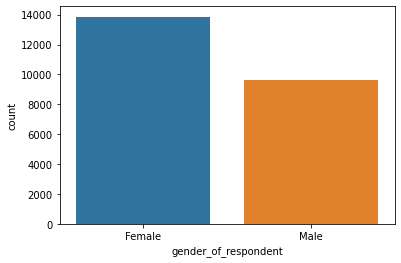

In [192]:
# For nominal and categorical variables we are using

sns.countplot(data = fin_all, x = "gender_of_respondent")

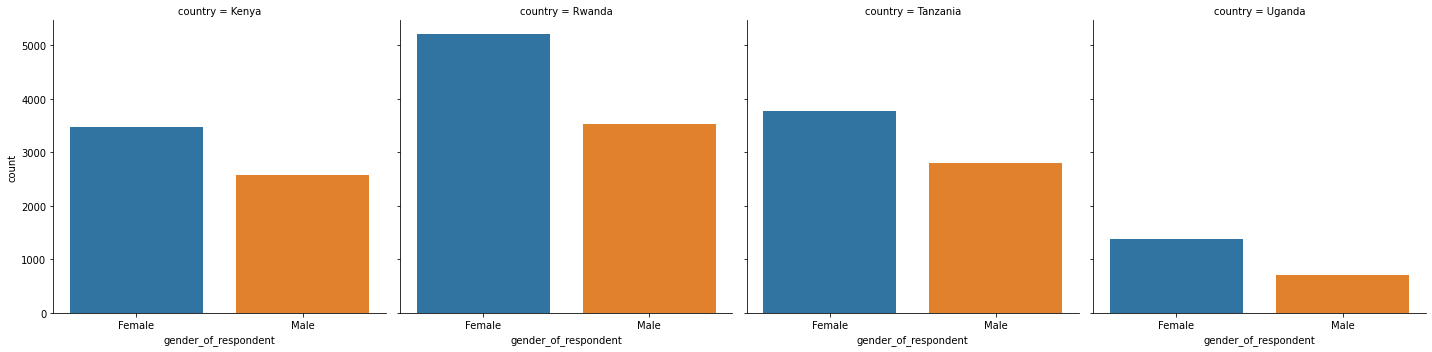

In [ ]:
sns.catplot(x = "gender_of_respondent", col = "country", data = fin_all, kind = "count")

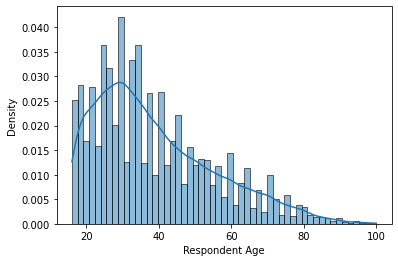

In [187]:
# For continuous values such as age

sns.histplot(fin_all["Respondent Age"], kde = True, stat = "density")

BIVARIATE ANALYSIS


In [188]:
fin_all[["household_size", "Respondent Age"]].describe()

,household_size,Respondent Age
count,23496.000000,23490.000000
mean,3.681818,38.804300
std,2.279933,16.519996
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [189]:
fin_rwanda = fin_all[fin_all["country"]=="Rwanda"]

fin_rwanda.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7.0,18.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6069,Rwanda,2016,uniqueid_2,Yes,Urban,Yes,4.0,26.0,Female,Spouse,Married/Living together,Secondary education,Self employed
6070,Rwanda,2016,uniqueid_3,No,Rural,No,6.0,42.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
6071,Rwanda,2016,uniqueid_4,Yes,Urban,Yes,1.0,41.0,Male,Head of Household,Single/Never Married,Tertiary education,Informally employed
6072,Rwanda,2016,uniqueid_5,No,Rural,No,4.0,17.0,Female,Child,Single/Never Married,Primary education,Informally employed


In [190]:
fin_rwanda.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
14798,Rwanda,2016,uniqueid_8755,No,Rural,Yes,5.0,31.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
14799,Rwanda,2016,uniqueid_8756,No,Rural,No,6.0,49.0,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
14800,Rwanda,2016,uniqueid_8757,No,Rural,Yes,6.0,42.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
14801,Rwanda,2016,uniqueid_8758,No,Rural,Yes,6.0,65.0,Male,Head of Household,Married/Living together,Primary education,Informally employed
14802,Rwanda,2016,uniqueid_8759,No,Rural,Yes,6.0,31.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing


In [ ]:
fin_uganda = fin_all[fin_all["country"]=="Uganda"]

In [ ]:
fin_uganda.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
21423,Uganda,2018,uniqueid_1,No,Rural,No,5.0,32.0,Female,Head of Household,Divorced/Seperated,Primary education,Other Income
21424,Uganda,2018,uniqueid_2,No,Urban,Yes,8.0,65.0,Female,Head of Household,Widowed,Secondary education,Self employed
21425,Uganda,2018,uniqueid_3,No,Rural,No,7.0,35.0,Female,Spouse,Married/Living together,Primary education,Self employed
21426,Uganda,2018,uniqueid_4,No,Rural,No,3.0,25.0,Female,Spouse,Married/Living together,Primary education,Other Income
21427,Uganda,2018,uniqueid_5,No,Urban,Yes,9.0,18.0,Female,Parent,Single/Never Married,Secondary education,Other Income


In [ ]:
fin_uganda.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
fin_kenya = fin_all[fin_all["country"]=="Kenya"]

fin_tanzania = fin_all[fin_all["country"]=="Tanzania"]

In [ ]:
fin_kenya.head()



,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
fin_kenya.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
6063,Kenya,2018,uniqueid_6067,No,Rural,Yes,4.0,26.0,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
6064,Kenya,2018,uniqueid_6068,No,Urban,No,5.0,17.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6065,Kenya,2018,uniqueid_6069,No,Rural,Yes,9.0,30.0,Female,Spouse,Married/Living together,No formal education,Farming and Fishing
6066,Kenya,2018,uniqueid_6070,No,Rural,Yes,3.0,52.0,Male,Head of Household,Married/Living together,Primary education,Self employed
6067,Kenya,2018,uniqueid_6071,No,Rural,Yes,2.0,75.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing


In [ ]:
fin_tanzania.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
14803,Tanzania,2017,uniqueid_1,No,Rural,Yes,1.0,22.0,Female,Child,Divorced/Seperated,Secondary education,No Income
14804,Tanzania,2017,uniqueid_2,No,Urban,No,2.0,100.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
14805,Tanzania,2017,uniqueid_3,No,Urban,Yes,3.0,19.0,Female,Head of Household,Widowed,No formal education,No Income
14806,Tanzania,2017,uniqueid_4,No,Urban,No,4.0,21.0,Female,Parent,Single/Never Married,Primary education,Remittance Dependent
14807,Tanzania,2017,uniqueid_5,Yes,Urban,Yes,3.0,24.0,Female,Parent,Divorced/Seperated,Tertiary education,Formally employed Private


In [ ]:
fin_tanzania.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
21418,Tanzania,2017,uniqueid_6633,No,Rural,No,2.0,25.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
21419,Tanzania,2017,uniqueid_6634,No,Urban,Yes,2.0,52.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
21420,Tanzania,2017,uniqueid_6635,No,Rural,No,5.0,16.0,Female,Other non-relatives,Divorced/Seperated,Primary education,Formally employed Private
21421,Tanzania,2017,uniqueid_6636,No,Urban,Yes,2.0,48.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
21422,Tanzania,2017,uniqueid_6637,No,Urban,Yes,1.0,25.0,Male,Head of Household,Married/Living together,Primary education,Self employed


In [ ]:
fin_all.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')